In [5]:
import numpy as np                               #for creating ndarrays for fast and efficient computations
import scipy as sc                               #for scientific computations and purposes
import pandas as pd                              #for tables
pd.options.display.max_rows = 15

import matplotlib as mpl                         #for graphing purposes
import matplotlib.pyplot as plt                  #for making plots
from matplotlib.path import Path
import matplotlib.patches as patches
from mpl_toolkits.mplot3d import Axes3D          #for making 3d Axes (canvas)

#for interactive notebooks
%matplotlib notebook

In [6]:
L=1
k = 0
n = 100
m = 2*n + 1 + k
x = np.linspace(0,4 * np.pi,500)
y = np.arange(1,n+1,1)
f_n = 4/(np.pi*m) * np.sin(m * np.pi * x / L)
X, Y = np.meshgrid(x,y)

In [7]:
#for loop
#f_x = np.zeros_like(x)
for i in range(1,n+1,1):
    m = 2 * (i-1) + 1 
    f_n = 4/(np.pi * m) * np.sin(m * np.pi * x / L) #can maybe define a function to return it here in this loop
    if i==1:
        f_m_n=f_n
    else:
        f_m_n = np.vstack((f_m_n, f_n))

The above cells are turned into a function for quick plotting of multiple n etc

In [13]:
def y_axis_int():
    yint = []
    locs, labels = plt.yticks()
    for each in locs:
        yint.append(int(each))
    plt.yticks(yint)
#ensures the units on the x axis are integer values
def x_axis_int():
    xint = []
    locs, labels = plt.xticks()
    for each in locs:
        xint.append(int(each))
    plt.xticks(xint)
    
def plot_properties(x_lower, x_upper, N):
    plt.xlabel('time (t)')
    plt.ylabel('n')
    plt.title('n = ' + str(N))
    plt.legend()
    plt.xlim(x_lower, x_upper)   
    plt.ylim(0,N)
    #ax_fourier.plot_wireframe(X, Y, f_m_n, rstride=1, cstride=0, cmap=plt.get_cmap('winter'))

In [14]:
#tried to make a class but it wasnt working out so decided to just make a single function

#this is function that basically sums a fourier series althugh it could technically be modified for other sums as well
#n is just the number of elements you want to include
#currently, it is set to plot a square wave
def func_series(n):
    lower = 0 # the lower phase of the periodic function
    upper = 4 * np.pi
    x = np.linspace(lower, upper, 500) # define x range
    y = np.arange(1, n + 1, 1) # define y range
    X, Y = np.meshgrid(x, y) # meshgrid for plotting
    #heres the loop
    for i in range(1, n + 1, 1): # this is essentially the summation symbol
        m = 2 * (i - 1) + 1  # basically plots odd integers, add + 1 to plot even integers
        f_n = 4/(np.pi * m) * np.sin(m * np.pi * x / L) # this is our fourier series, what we are summing over
        if i==1: # the first iteration defines f_m_n to be equal to f_n, this is just to create an np.array 
            f_m_n = f_n # so that we can concatenate with the next element in the series
        else:
            f_m_n = np.vstack((f_m_n, f_n)) #this is where we concatenate each new element into a new row
    #create plot        
    f=np.sum(f_m_n, axis=0)        
    fourier_plt=plt.figure(n, figsize =(5,4))
    ax_fourier = fourier_plt.add_subplot(111,projection ='3d')
    f_x_line = ax_fourier.plot_wireframe(X, Y, f_m_n, rstride=1, cstride=0, cmap=plt.get_cmap('winter'))
    f_line = ax_fourier.plot(x, np.zeros_like(x), f, 'r', label = '"Square Wave"')
    ax_fourier.set_zlabel('Intensity')
    #labels and range and stuff defined here
    plot_properties(x_lower = lower,x_upper = upper,N=n)
    #ensures the units on the y axis are integer values
    y_axis_int()
    #ensures the units on the x axis are integer values
    x_axis_int()

    plt.tight_layout()
    fourier_plt.savefig('Fourier-series-squarewave-'+str(n)+'.png', format = 'png')

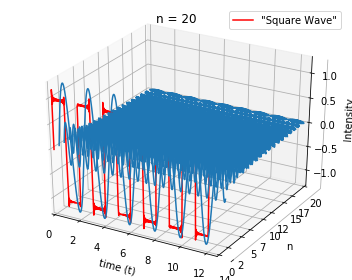

In [15]:
func_series(20)